<a href="https://colab.research.google.com/github/Reshmitha12/summer-of-code-2024/blob/main/ml_w1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"reshmitha05","key":"eb87b8ee913962e411f10b05261b76ac"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                     📚 Students Performance Dataset 📚                  66KB  2024-06-12 23:09:20           3344         63  1.0              
mayankanand2701/samsung-stock-price-dataset                     Samsung Stock Price Dataset 📱🏭📈                  114KB  2024-06-13 14:51:11           1136         30  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26          10883        195  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Stream

In [ ]:
! kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
License(s): CC-BY-NC-SA-4.0
 95% 169M/178M [00:01<00:00, 65.2MB/s]
100% 178M/178M [00:01<00:00, 101MB/s] 


In [ ]:
! unzip online-payments-fraud-detection-dataset.zip

Archive:  online-payments-fraud-detection-dataset.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
for col in df.columns:
    print(col)

step
type
amount
nameOrig
oldbalanceOrg
newbalanceOrig
nameDest
oldbalanceDest
newbalanceDest
isFraud
isFlaggedFraud


In [ ]:
one_hot=pd.get_dummies(df['type'])
df=df.drop("type",axis=1)
df=df.join(one_hot)

In [ ]:
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True


In [ ]:
df=df.drop(columns="nameOrig")
df["dest_type"]=df["nameDest"].str[:1]

In [ ]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,dest_type
0,1,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False,M
1,1,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False,M
2,1,181.00,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True,C
3,1,181.00,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False,C
4,1,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False,C
6362616,743,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True,C
6362617,743,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False,C
6362618,743,850002.52,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True,C


In [ ]:
df=df.drop(columns="nameDest")

In [ ]:
oh=pd.get_dummies(df['dest_type'])
df=df.drop("dest_type",axis=1)
df=df.join(oh)

In [ ]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,False,True
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,False,True
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,True,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,True,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,True,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False


In [ ]:
df=df.drop(columns="M")

In [ ]:
df_nf=df[df["isFraud"]==0]

In [ ]:
df_f=df[df["isFraud"]==1]

In [ ]:
df_nf=df_nf.sample(n=8000)

In [ ]:
df_f=df_f.sample(n=8000)

In [ ]:
df=pd.concat([df_f,df_nf])

In [ ]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
6118831,537,266546.68,266546.68,0.00,0.00,0.00,1,0,False,False,False,False,True,True
6131929,543,57204.07,57204.07,0.00,2726027.96,2783232.03,1,0,False,True,False,False,False,True
1707590,160,10000000.00,10000000.00,0.00,158643.25,10158643.25,1,0,False,True,False,False,False,True
6202684,583,459378.91,459378.91,0.00,0.00,0.00,1,0,False,False,False,False,True,True
1059617,109,177344.53,177344.53,0.00,567501.75,744846.28,1,0,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295014,15,42368.27,264453.12,306821.39,758439.99,716071.72,0,0,True,False,False,False,False,True
1396153,139,212285.64,0.00,0.00,1913390.79,2125676.43,0,0,False,False,False,False,True,True
2326681,188,17862.20,0.00,0.00,0.00,0.00,0,0,False,False,False,True,False,False
5152117,357,156613.49,9668.00,0.00,925548.56,1082162.05,0,0,False,False,False,False,True,True


In [ ]:
df = df.sample(frac = 1) #for randomizing rows to separate isFraud not isnotFraud

In [ ]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
5222304,370,340400.81,0.00,0.00,790937.05,1131337.86,0,0,False,True,False,False,False,True
889394,42,6653.52,0.00,0.00,275919.95,282573.47,0,0,False,True,False,False,False,True
4785652,341,414394.38,414394.38,0.00,0.00,0.00,1,0,False,False,False,False,True,True
6010948,446,239095.53,239095.53,0.00,65367.32,304462.85,1,0,False,True,False,False,False,True
1060902,119,224913.14,224913.14,0.00,1063073.21,1287986.36,1,0,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4388787,320,248409.56,248409.56,0.00,2156174.28,2404583.85,1,0,False,True,False,False,False,True
5563207,386,978362.97,978362.97,0.00,123481.51,1101844.48,1,0,False,True,False,False,False,True
5563083,386,4587.02,101297.00,96709.98,0.00,0.00,0,0,False,False,False,True,False,False
5454549,379,163066.69,96259.00,0.00,0.00,163066.69,0,0,False,True,False,False,False,True


In [ ]:
def norm_colm(df,col):
  df_c=df[col]
  mx=df_c.max()
  mn=df_c.min()
  df[col]= (df_c - mn)/ (mx-mn)

In [ ]:
cl= ["step","amount","oldbalanceOrg","newbalanceOrig","newbalanceDest","oldbalanceDest"]
for col in cl:
  norm_colm(df,col)

In [ ]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
5222304,0.497305,0.029874,0.000000,0.00000,0.003348,0.004779,0,0,False,True,False,False,False,True
889394,0.055256,0.000584,0.000000,0.00000,0.001168,0.001194,0,0,False,True,False,False,False,True
4785652,0.458221,0.036367,0.006955,0.00000,0.000000,0.000000,1,0,False,False,False,False,True,True
6010948,0.599730,0.020983,0.004013,0.00000,0.000277,0.001286,1,0,False,True,False,False,False,True
1060902,0.159030,0.019738,0.003775,0.00000,0.004500,0.005441,1,0,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4388787,0.429919,0.021800,0.004169,0.00000,0.009127,0.010158,1,0,False,True,False,False,False,True
5563207,0.518868,0.085861,0.016420,0.00000,0.000523,0.004655,1,0,False,True,False,False,False,True
5563083,0.518868,0.000403,0.001700,0.00195,0.000000,0.000000,0,0,False,False,False,True,False,False
5454549,0.509434,0.014311,0.001615,0.00000,0.000000,0.000689,0,0,False,True,False,False,False,True


Model training

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9921875


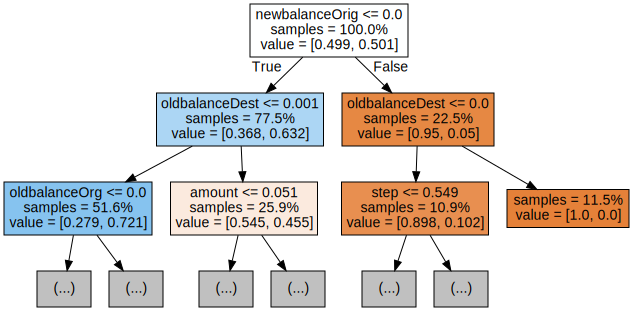

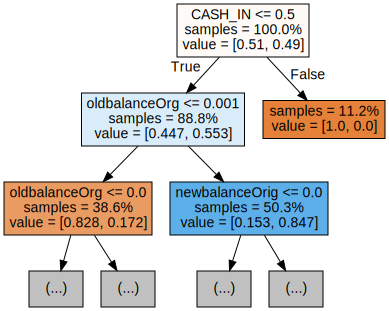

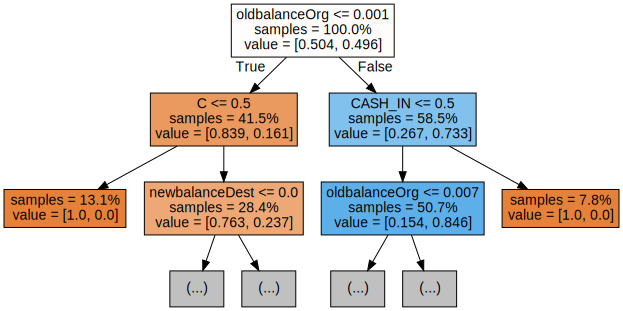

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7db7c0961660>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7db7c09613f0>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 457}


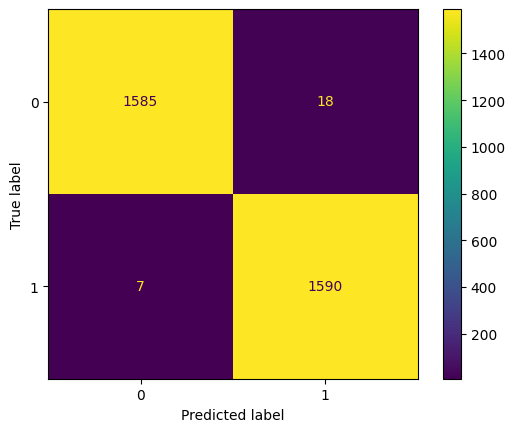

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9921875
Precision: 0.9888059701492538
Recall: 0.9956167814652473


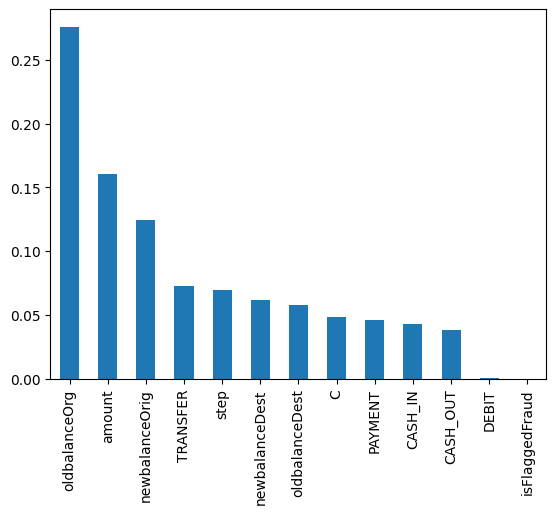

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

**But these parameters have low accuracy than the before hyperparameters, so using the default parameters, displaying a confusion matrix, feature importances.

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

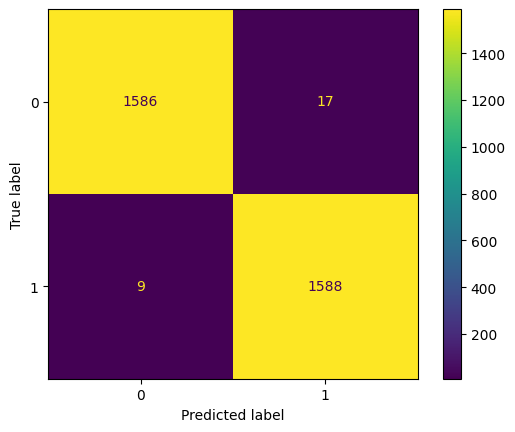

In [ ]:
# Generate predictions with the best model
y_pred = rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.991875
Precision: 0.9894080996884735
Recall: 0.9943644333124608


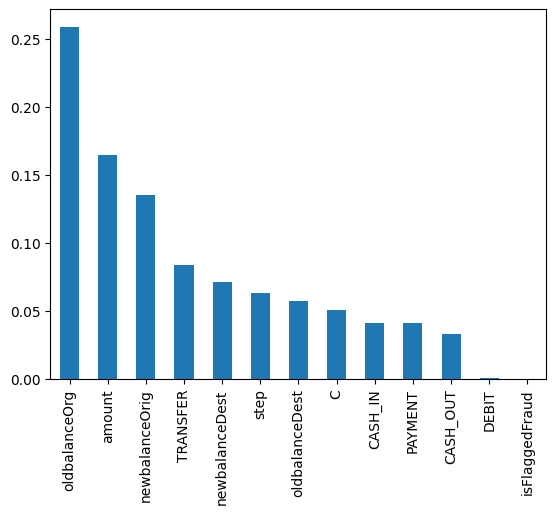

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

logistic reg

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
clf_model = LogisticRegression()

In [ ]:
clf_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = clf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.836875


In [ ]:
conmat = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
y_pred_proba = clf_model.predict_proba(np.array(X_test))[:,1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

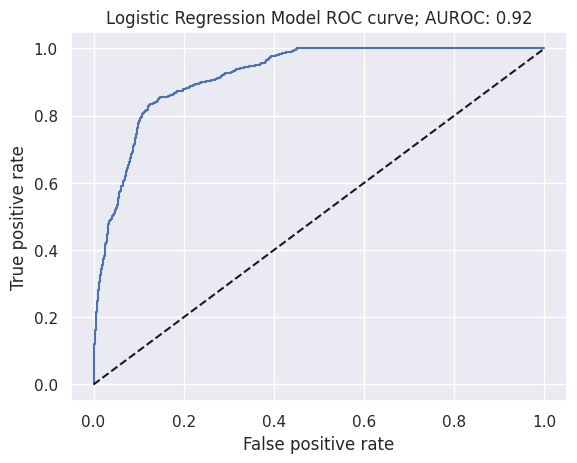

In [ ]:
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');

plt.show()

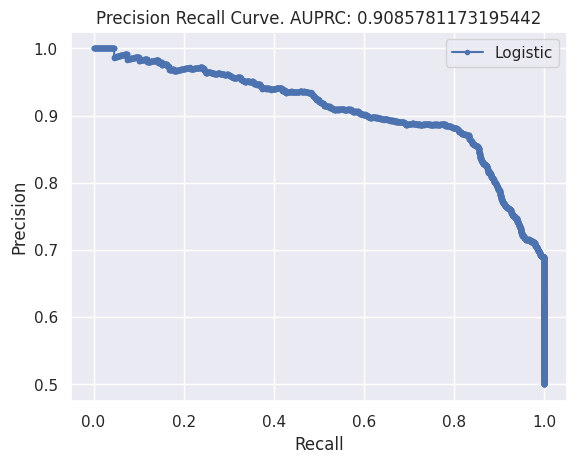

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

average_precision = average_precision_score(y_test, y_pred_proba)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recall, precision, marker='.', label='Logistic')

plt.xlabel('Recall')

plt.ylabel('Precision')

plt.legend()

plt.title(f'Precision Recall Curve. AUPRC: {average_precision}')

plt.show()

XGBoost

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [ ]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

In [ ]:
! pip install --user xgboost
